In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = 'Depression_1604001.csv'
df = pd.read_csv(data)

In [3]:
df.shape

(1004, 21)

In [4]:
df.head()

,Timestamp,Year,Feelings,Scale,Gender,Age,Location,Relationship,Finance,Adjustment,...,Study_pressure,Result,Living,Support,Social_media,Inferiority,Meal,Sick,Recreation,Sleep
0,11/29/2020 10:08:31,1st year,Good,70,Male,18,Hall-Mess,Single,Yes,3,...,No,No,No,Family,Yes,No,Yes,No,Yes,8
1,11/29/2020 10:11:20,1st year,Normal,60,Male,18,Hall-Mess,Single,Yes,3,...,Yes,No,No,Family,No,No,Yes,No,Yes,10
2,11/29/2020 11:10:42,2nd year,Good,70,Male,19,Hall-Mess,Single,Yes,4,...,Yes,Yes,Yes,Family,Yes,No,No,No,Yes,8
3,11/29/2020 11:21:29,2nd year,Normal,50,Male,19,Department,Single,Yes,2,...,Yes,No,Yes,Family,No,No,No,Yes,No,6
4,11/29/2020 11:22:51,1st year,Good,90,Male,18,Home,Single,Yes,2,...,No,Yes,Yes,Family,Yes,No,Yes,No,Yes,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       1004 non-null   object
 1   Year            1004 non-null   object
 2   Feelings        1004 non-null   object
 3   Scale           1004 non-null   int64 
 4   Gender          1004 non-null   object
 5   Age             1004 non-null   int64 
 6   Location        1004 non-null   object
 7   Relationship    1004 non-null   object
 8   Finance         1004 non-null   object
 9   Adjustment      1004 non-null   int64 
 10  Understanding   1004 non-null   object
 11  Study_pressure  1004 non-null   object
 12  Result          1004 non-null   object
 13  Living          1004 non-null   object
 14  Support         1004 non-null   object
 15  Social_media    1004 non-null   object
 16  Inferiority     1004 non-null   object
 17  Meal            1004 non-null   object
 18  Sick    

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull()

,Timestamp,Year,Feelings,Scale,Gender,Age,Location,Relationship,Finance,Adjustment,...,Study_pressure,Result,Living,Support,Social_media,Inferiority,Meal,Sick,Recreation,Sleep
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Timestamp         0
Year              0
Feelings          0
Scale             0
Gender            0
Age               0
Location          0
Relationship      0
Finance           0
Adjustment        0
Understanding     0
Study_pressure    0
Result            0
Living            0
Support           0
Social_media      0
Inferiority       0
Meal              0
Sick              0
Recreation        0
Sleep             0
dtype: int64

In [9]:
df.describe()

,Scale,Age,Adjustment,Sleep
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,49.108566,20.461155,2.991036,4.747012
std,28.592387,1.204629,1.411009,2.218328
min,5.000000,18.000000,1.000000,1.000000
25%,25.000000,19.000000,2.000000,3.000000
50%,50.000000,20.000000,3.000000,5.000000
75%,75.000000,21.000000,4.000000,6.000000
max,100.000000,23.000000,5.000000,10.000000


,Feelings,Count,Relationship
0,Bad,229,1
1,Good,149,4
2,Normal,224,4
3,Very bad,181,2
4,Very good,221,5


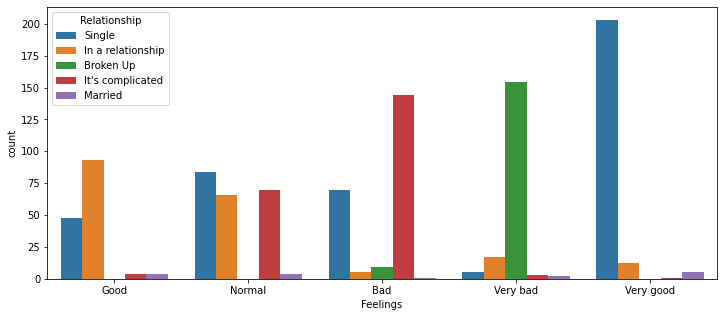

In [10]:
# Creating frequency table
freq_table = df.groupby(['Feelings']).size().reset_index(name='Count')
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == 'Single')].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == 'In a relationship')].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == 'Broken Up')].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == 'It''s complicated')].count())
freq_table['Relationship'] = freq_table['Feelings'].apply(lambda x : df['Feelings'][(df['Feelings'] == x) & (df['Relationship'] == 'Married')].count())

plt.figure(figsize=(12, 5))
sns.countplot(x='Feelings', data=df, hue='Relationship')
freq_table

<AxesSubplot:xlabel='Feelings', ylabel='Scale'>

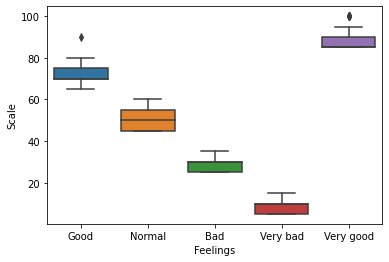

In [11]:
sns.boxplot(x="Feelings",y="Scale",data=df)

<AxesSubplot:xlabel='Feelings', ylabel='Sleep'>

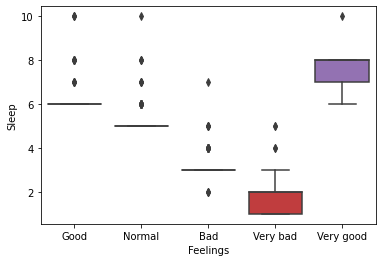

In [12]:
sns.boxplot(x="Feelings",y="Sleep",data=df)

<AxesSubplot:xlabel='Feelings', ylabel='Adjustment'>

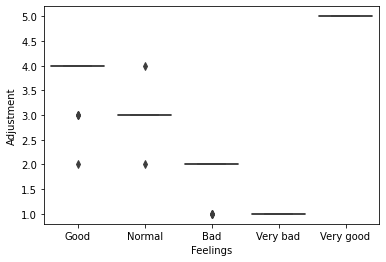

In [13]:
sns.boxplot(x="Feelings",y="Adjustment",data=df)

<AxesSubplot:xlabel='Scale', ylabel='Feelings'>

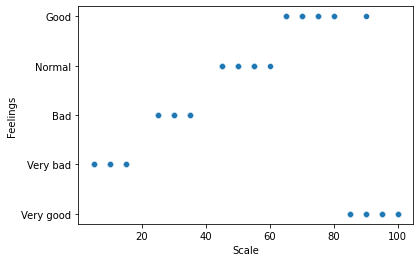

In [14]:
sns.scatterplot(x=df['Scale'], y=df['Feelings'])

<AxesSubplot:xlabel='Age', ylabel='Scale'>

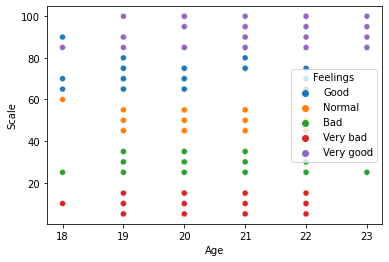

In [15]:
sns.scatterplot(x=df['Age'], y=df['Scale'],hue=df['Feelings'])

<AxesSubplot:xlabel='Age', ylabel='Scale'>

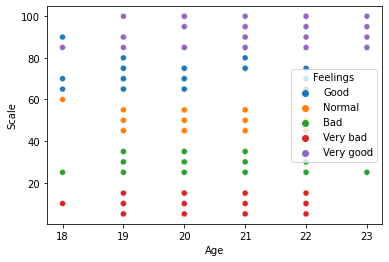

In [16]:
sns.scatterplot(x=df['Age'], y=df['Scale'],hue=df['Feelings'])

<AxesSubplot:xlabel='Adjustment', ylabel='Scale'>

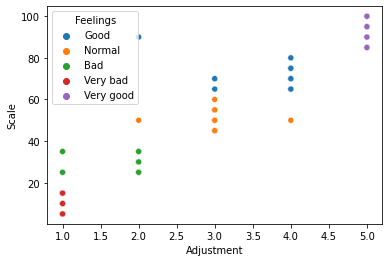

In [17]:
sns.scatterplot(x=df['Adjustment'], y=df['Scale'], hue=df['Feelings'])

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflo

<AxesSubplot:xlabel='Feelings', ylabel='Scale'>

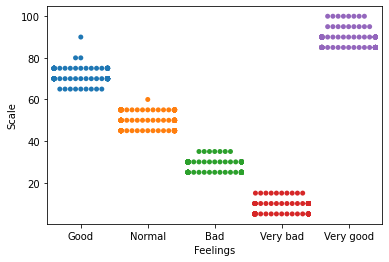

In [18]:
sns.swarmplot(x=df['Feelings'],y=df['Scale'])

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflo

<AxesSubplot:xlabel='Feelings', ylabel='Sleep'>

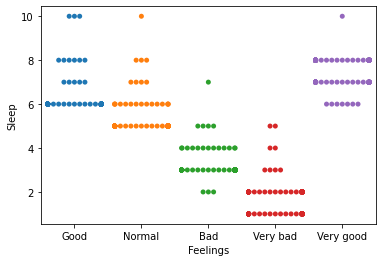

In [19]:
sns.swarmplot(x=df['Feelings'],y=df['Sleep'])

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflo

<AxesSubplot:xlabel='Feelings', ylabel='Adjustment'>

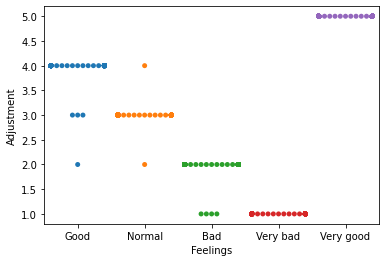

In [20]:
sns.swarmplot(x=df['Feelings'],y=df['Adjustment'])

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\subor\.conda\envs\tensorflo

<AxesSubplot:xlabel='Feelings', ylabel='Age'>

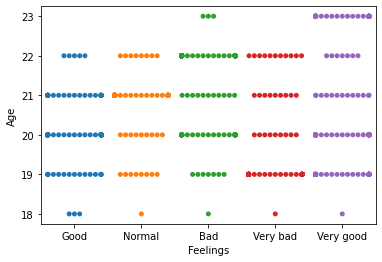

In [21]:
sns.swarmplot(x=df['Feelings'],y=df['Age'])

In [22]:
df.drop(['Timestamp','Year','Age','Gender'],axis=1,inplace=True)

In [23]:
df.head()

,Feelings,Scale,Location,Relationship,Finance,Adjustment,Understanding,Study_pressure,Result,Living,Support,Social_media,Inferiority,Meal,Sick,Recreation,Sleep
0,Good,70,Hall-Mess,Single,Yes,3,Good,No,No,No,Family,Yes,No,Yes,No,Yes,8
1,Normal,60,Hall-Mess,Single,Yes,3,Good,Yes,No,No,Family,No,No,Yes,No,Yes,10
2,Good,70,Hall-Mess,Single,Yes,4,Good,Yes,Yes,Yes,Family,Yes,No,No,No,Yes,8
3,Normal,50,Department,Single,Yes,2,Good,Yes,No,Yes,Family,No,No,No,Yes,No,6
4,Good,90,Home,Single,Yes,2,Good,No,Yes,Yes,Family,Yes,No,Yes,No,Yes,10


In [24]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [25]:
import category_encoders as ce

In [26]:
encoder = ce.OrdinalEncoder(cols=['Support','Relationship','Finance','Understanding','Study_pressure','Result','Living','Inferiority','Sick','Recreation','Location','Social_media','Meal'])

df = encoder.fit_transform(df)

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [27]:
df.head()

,Feelings,Scale,Location,Relationship,Finance,Adjustment,Understanding,Study_pressure,Result,Living,Support,Social_media,Inferiority,Meal,Sick,Recreation,Sleep
0,Good,70,1,1,1,3,1,1,1,1,1,1,1,1,1,1,8
1,Normal,60,1,1,1,3,1,2,1,1,1,2,1,1,1,1,10
2,Good,70,1,1,1,4,1,2,2,2,1,1,1,2,1,1,8
3,Normal,50,2,1,1,2,1,2,1,2,1,2,1,2,2,2,6
4,Good,90,3,1,1,2,1,1,2,2,1,1,1,1,1,1,10


In [28]:
df['Feelings'] = df['Feelings'].map({'Very good': 0, 'Good': 1, 'Normal': 2, "Bad": 3, 'Very bad' : 4})

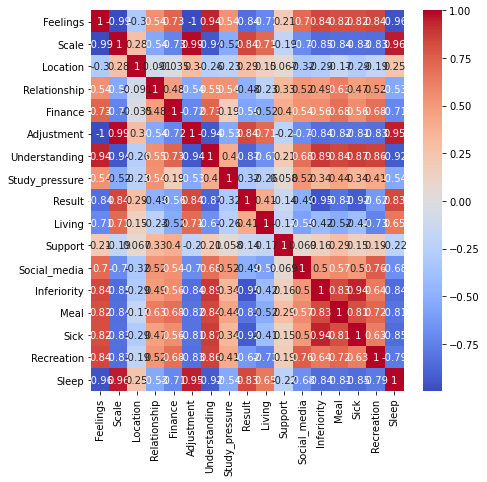

In [29]:
plt.figure(figsize=(7,7))
p=sns.heatmap(df.corr(), annot=True,cmap='coolwarm',center=0) 

In [30]:
status = pd.get_dummies(df['Relationship'],drop_first=True)
status1 = pd.get_dummies(df['Finance'],drop_first=True)
status2 = pd.get_dummies(df['Understanding'],drop_first=True)
status3 = pd.get_dummies(df['Study_pressure'],drop_first=True)
status4 = pd.get_dummies(df['Result'],drop_first=True)
status5 = pd.get_dummies(df['Living'],drop_first=True)
status6 = pd.get_dummies(df['Inferiority'],drop_first=True)
status7 = pd.get_dummies(df['Sick'],drop_first=True)
status8 = pd.get_dummies(df['Recreation'],drop_first=True)
status9 = pd.get_dummies(df['Location'],drop_first=True)
status10 = pd.get_dummies(df['Social_media'],drop_first=True)
status11 = pd.get_dummies(df['Support'],drop_first=True)
status12 = pd.get_dummies(df['Meal'],drop_first=True)

In [31]:
status11.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [32]:
status9.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,1,0


In [33]:
status=status.rename(columns={1 :'Single', 2 : 'In_a_relation',3:'Broken_up',4:'Complicated',5:'Married'})
status1=status1.rename(columns={1 :'Finance_Yes', 2 : 'Finance_No'})
status2=status2.rename(columns={1 :'Understanding_Good', 2 : 'Understanding_Normal',3:'Understanding_Bad'})
status3=status3.rename(columns={1 :'Study_pressure_No', 2 : 'Study_pressure_Yes'})
status4=status4.rename(columns={1 :'Result_No', 2 : 'Result_Yes'})
status5=status5.rename(columns={1 :'Living_No', 2 : 'Living_Yes'})
status6=status6.rename(columns={1 :'Inferiority_No', 2 : 'Inferiority_Yes'})
status7=status7.rename(columns={1 :'Sick_No', 2 : 'Sick_Yes'})
status8=status8.rename(columns={1 :'Recreation_Yes', 2 : 'Recreation_No'})
status9=status9.rename(columns={1 :'Location_Hall_Mess', 2 : 'Location_Department', 3 : 'Location_Home', 4 : 'Location_Playground'})
status10=status10.rename(columns={1 :'Social_media_Yes', 2 : 'Social_media_No'})
status11=status11.rename(columns={1 :'Support_Family', 2 : 'Support_Teacher',3:'Support_No_one',4:'Support_Friends'})
status12=status12.rename(columns={1 :'Meal_Yes', 2 : 'Meal_No', 3: 'Meal_Neutral'})

In [34]:
status12.head()

,Meal_No,Meal_Neutral
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0


In [35]:
df = pd.concat([df, status], axis = 1)
df = pd.concat([df, status1], axis = 1)
df = pd.concat([df, status2], axis = 1)
df = pd.concat([df, status3], axis = 1)
df = pd.concat([df, status4], axis = 1)
df = pd.concat([df, status5], axis = 1)
df = pd.concat([df, status6], axis = 1)
df = pd.concat([df, status7], axis = 1)
df = pd.concat([df, status8], axis = 1)
df = pd.concat([df, status9], axis = 1)
df = pd.concat([df, status10], axis = 1)
df = pd.concat([df, status11], axis = 1)
df = pd.concat([df, status12], axis = 1)

In [36]:
df.head()

,Feelings,Scale,Location,Relationship,Finance,Adjustment,Understanding,Study_pressure,Result,Living,...,Recreation_No,Location_Department,Location_Home,Location_Playground,Social_media_No,Support_Teacher,Support_No_one,Support_Friends,Meal_No,Meal_Neutral
0,1,70,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,60,1,1,1,3,1,2,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,70,1,1,1,4,1,2,2,2,...,0,0,0,0,0,0,0,0,1,0
3,2,50,2,1,1,2,1,2,1,2,...,1,1,0,0,1,0,0,0,1,0
4,1,90,3,1,1,2,1,1,2,2,...,0,0,1,0,0,0,0,0,0,0


In [37]:
df.drop(['Relationship'], axis = 1, inplace = True)
df.drop(['Finance'], axis = 1, inplace = True)
df.drop(['Understanding'], axis = 1, inplace = True)
df.drop(['Study_pressure'], axis = 1, inplace = True)
df.drop(['Result'], axis = 1, inplace = True)
df.drop(['Living'], axis = 1, inplace = True)
df.drop(['Inferiority'], axis = 1, inplace = True)
df.drop(['Sick'], axis = 1, inplace = True)
df.drop(['Recreation'], axis = 1, inplace = True)
df.drop(['Support'], axis = 1, inplace = True)
df.drop(['Social_media'], axis = 1, inplace = True)
df.drop(['Meal'], axis = 1, inplace = True)
df.drop(['Location'], axis = 1, inplace = True)

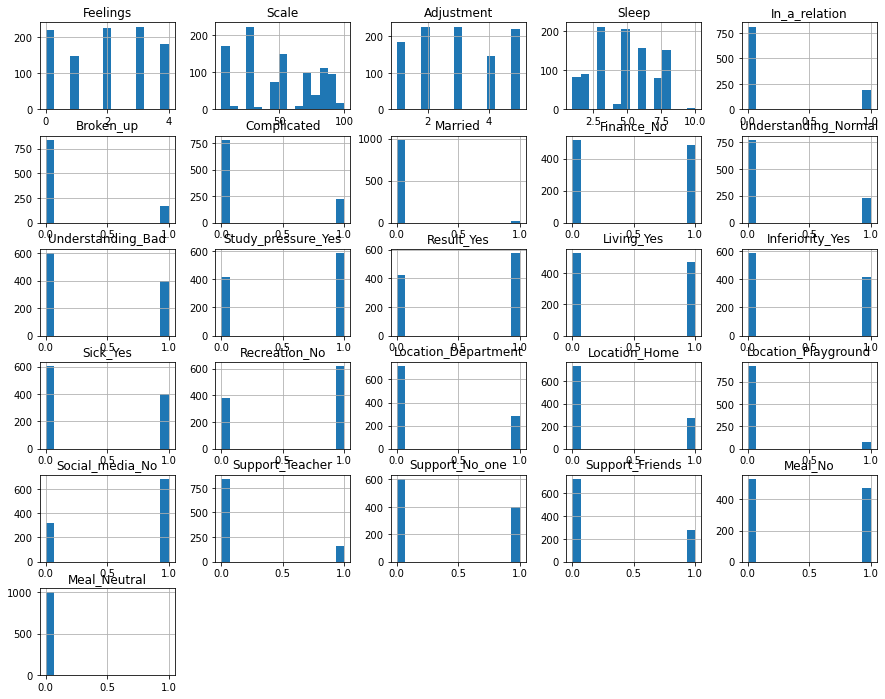

In [38]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [39]:
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [40]:
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

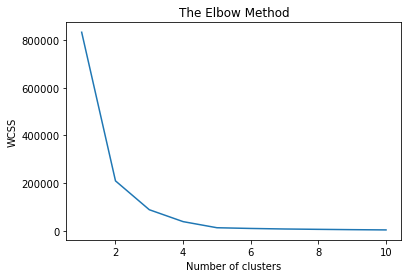

In [41]:
wcss = []
X = df.values
for i in range(1, 11):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Load Data
pca = PCA(2)

In [43]:
#Transform the data
df1 = pca.fit_transform(df)

In [44]:
df1

array([[ 21.09495085,   0.39780251],
       [ 11.23586751,   1.80410078],
       [ 21.14656709,   0.29669243],
       ...,
       [ 36.10847104,  -0.90743689],
       [ -4.06564512,   1.58002525],
       [-24.25326575,  -0.50173198]])

In [45]:
#Applying our function
label = kmeans(df1,4,1000)

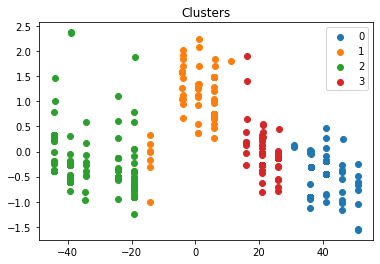

In [46]:
#Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1],label = i)
plt.title('Clusters')
plt.legend()
plt.show()